In [1]:
import src
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inputs = [
    "../../data/processed/refactor-test/results/methods/GaMD-H2O-2000-nan-NOE_fulfilled.json",
    "../../data/processed/refactor-test/results/methods/cMD-H2O-2000-nan-NOE_fulfilled.json",
    "../../data/processed/mini-experiments/results/methods/leave10GaMD.json",
]

labels = ["GaMD-H2O-2000", "cMD-H2O-2000", "GaMD-H2O-2000-leave-out"]

#     "../../data/processed/refactor-test/results/methods/omega-basic-NOE_fulfilled.json"

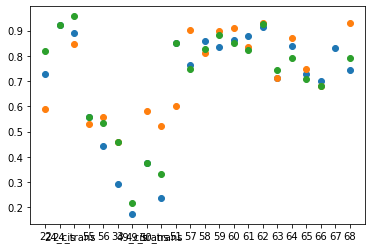

In [3]:
results = [src.utils.json_load(i) for i in inputs]
fig, ax = plt.subplots()
all_compounds = []

for idx, el in enumerate(results):
    compounds = []
    values = []
    for key, value in el.items():
        compounds.append(key.split("-")[-1])
        values.append(value)
    ax.scatter(compounds, values, label=labels[idx])
    all_compounds.extend(compounds)

In [4]:
# all_compounds = list(set(all_compounds))

# # temporary addition to account for conformer generators do not fulfill cis/trans yet...
# #all_compounds = list(set([a.split("_")[0] for a in all_compounds]))
# confgen = src.utils.json_load(inputs[-1])
# confgen_values = [float(confgen[c]) for c in all_compounds]
# ax.scatter(confgen_values, all_compounds, label=snakemake.input[-1].split("/")[5].split("-best")[0])

In [5]:
# ax.scatter(confgen['best'].keys(), [float(a) for a in confgen['best'].values()], label=f"{inputs[-1].split('/')[7].split('-NOE')[0]} {'best'}")
# ax.scatter([a.split('_single')[0] for a in confgen["random"].keys()], [float(a[3]) for a in confgen['random'].values()],  label=f"{inputs[-1].split('/')[5].split('-NOE')[0]} {'random - 10'}")
# ax.scatter([a.split('_single')[0] for a in confgen["low_energy"].keys()], [float(a[3]) for a in confgen['low_energy'].values()], label=f"{inputs[-1].split('/')[5].split('-NOE')[0]} {'low_energy - 10'}")
# ax.scatter([a.split('_single')[0] for a in confgen["licuv"].keys()], [float(a[3]) for a in confgen['licuv'].values()], label=f"{inputs[-1].split('/')[5].split('-NOE')[0]} {'licuv - 10'}")

In [6]:
ax.legend()
ax.set_ylabel("% NOE fulfilled")
ax.set_xlabel("Compounds")
ax.set_ylim([0, 1])
fig.autofmt_xdate(rotation=45)
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

In [30]:
fig.tight_layout()
fig.savefig(
    "../../data/processed/mini-experiments/results/methods/leave10GaMD.png",
    dpi=300,
)

<ipython-input-30-d3689f6735e4>:1: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


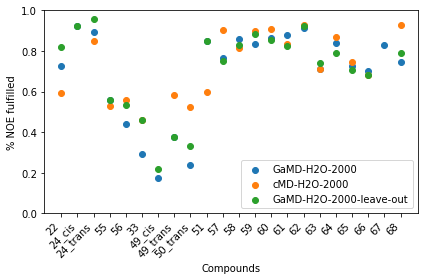

In [8]:
fig

In [9]:
from scipy import stats

In [15]:
df = pd.DataFrame()
for idx, a in enumerate(inputs):
    method_dict = src.utils.json_load(a)
    method_dict = {k.split("-")[1]: v for k, v in method_dict.items()}
    df2 = pd.DataFrame.from_dict(
        method_dict, orient="index", columns=[labels[idx]]
    )
    df = pd.concat([df, df2], axis=1)

In [16]:
# confgen = src.utils.json_load(inputs[-1])
# confgen['licuv'] = {k.split('_single')[0]:v for k,v in confgen['licuv'].items()}
# df2 = pd.DataFrame.from_dict(confgen['best'], orient='index', columns=[f"{inputs[-1].split('/')[5].split('-NOE')[0]} {'best'}"], dtype=float)
# df3 = pd.DataFrame.from_dict(confgen['licuv'], orient='index', columns=[f"{inputs[-1].split('/')[5].split('-NOE')[0]} {'licuv1'}",'3','5', '10', '30'], dtype=float)
# df = pd.concat([df, df2, df3], axis=1)
# # df["omega-basic best"] = pd.to_numeric(df["omega-basic best"])

In [17]:
df

,GaMD-H2O-2000,cMD-H2O-2000,GaMD-H2O-2000-leave-out
22,0.727273,0.590909,0.818182
24_cis,0.923077,NaN,0.923077
24_trans,0.891304,0.847826,0.956522
55,0.558824,0.529412,0.558824
56,0.441860,0.558140,0.534884
33,0.291667,0.458333,0.458333
49_cis,0.173913,NaN,0.217391
49_trans,0.375000,0.583333,0.375000
50_trans,0.238095,0.523810,0.333333
51,0.850000,0.600000,0.850000


In [18]:
df.describe()

,GaMD-H2O-2000,cMD-H2O-2000,GaMD-H2O-2000-leave-out
count,22.000000,19.000000,21.000000
mean,0.688346,0.732759,0.704788
std,0.233802,0.161444,0.210982
min,0.173913,0.458333,0.217391
25%,0.594650,0.587121,0.558824
50%,0.754037,0.747573,0.790000
75%,0.857031,0.885000,0.850000
max,0.923077,0.930348,0.956522


In [20]:
stats.ttest_rel(
    df["GaMD-H2O-2000"], df["GaMD-H2O-2000-leave-out"], nan_policy="omit"
)

Ttest_relResult(statistic=-1.9103371947043866, pvalue=0.0705344864911556)

In [22]:
stats.ttest_rel(
    df["cMD-H2O-2000"], df["GaMD-H2O-2000-leave-out"], nan_policy="omit"
)

Ttest_relResult(statistic=0.5017212735999295, pvalue=0.6219448907088362)

In [23]:
stats.wilcoxon(df["GaMD-H2O-2000"], df["GaMD-H2O-2000-leave-out"])

/biggin/b147/univ4859/miniconda3/envs/stats/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=44.0, pvalue=0.07070932047868624)

In [24]:
stats.ttest_rel(df["GaMD-H2O-2000"], df["cMD-H2O-2000"], nan_policy="omit")

Ttest_relResult(statistic=-1.2737957713189099, pvalue=0.21893865356536288)

In [ ]:
stats.wilcoxon(
    df["GaMD-H2O-2000-nan-"], df["cMD-H2O-2000-nan-"], alternative="two-sided"
)

In [ ]:
stats.ttest_rel(
    df["cMD-H2O-2000-nan-"],
    df[f"{'-'.join(snakemake.wildcards.methods.split('-')[-2:])} best"],
    nan_policy="omit",
)

In [ ]:
stats.wilcoxon(
    df["cMD-H2O-2000-nan-"],
    df[f"{'-'.join(snakemake.wildcards.methods.split('-')[-2:])} best"],
    alternative="two-sided",
)